空調データ準備

In [1]:
import pandas as pd

In [2]:
df_office = pd.read_csv("./summary_20230112.csv")
df_scan = pd.read_csv("./summary_scan1.csv")

df_scan.rename(columns={'Unnamed: 0':'case_name'}, inplace=True)

df_scan.drop(['1_x','1_y','1_angle','2_x','2_y','2_angle','3_x','3_y','3_angle','4_x','4_y','4_angle','5_x','5_y','5_angle','size_x','size_y'], axis=1, inplace=True)

def add_prefix(text):
    prefix = 'scan1_'
    return prefix + text

df_scan['case_name'] = df_scan['case_name'].apply(add_prefix)

In [3]:
df_office

,case_name,office,aircon,ventilation,exhaust,countTimeMean_onlyFloating
0,office1_0_0,office1,0.0,0.0,off,2991.405667
1,office1_0_123_aout,office1,0.0,123.0,a,2656.982333
2,office1_0_123_bout,office1,0.0,123.0,b,2951.144667
3,office1_0_164_aout,office1,0.0,164.0,a,2470.395667
4,office1_0_164_bout,office1,0.0,164.0,b,3271.053000
...,...,...,...,...,...,...
902,office33_960_164_bout,office33,960.0,164.0,b,2504.354667
903,office33_960_246_aout,office33,960.0,246.0,a,1331.682000
904,office33_960_246_bout,office33,960.0,246.0,b,1495.644000
905,office33_960_82_aout,office33,960.0,82.0,a,2227.621000


In [4]:
df_scan

,case_name,office,aircon,ventilation,exhaust,countTimeMean_onlyFloating
0,scan1_0_0,scan1,0,0,off,1757.936667
1,scan1_0_164_aout,scan1,0,164,a,1869.638333
2,scan1_0_164_bout,scan1,0,164,b,1362.842000
3,scan1_0_246_aout,scan1,0,246,a,1542.956667
4,scan1_0_246_bout,scan1,0,246,b,1825.899000
5,scan1_0_82_aout,scan1,0,82,a,1967.014333
6,scan1_0_82_bout,scan1,0,82,b,1744.621000
7,scan1_360_0,scan1,360,0,off,1650.899000
8,scan1_360_164_aout,scan1,360,164,a,1652.457667
9,scan1_360_164_bout,scan1,360,164,b,1659.433667


In [5]:
df_summary = pd.concat([df_office, df_scan])
df_summary.reset_index(drop=True)

,case_name,office,aircon,ventilation,exhaust,countTimeMean_onlyFloating
0,office1_0_0,office1,0.0,0.0,off,2991.405667
1,office1_0_123_aout,office1,0.0,123.0,a,2656.982333
2,office1_0_123_bout,office1,0.0,123.0,b,2951.144667
3,office1_0_164_aout,office1,0.0,164.0,a,2470.395667
4,office1_0_164_bout,office1,0.0,164.0,b,3271.053000
...,...,...,...,...,...,...
930,scan1_960_164_bout,scan1,960.0,164.0,b,1852.020000
931,scan1_960_246_aout,scan1,960.0,246.0,a,1825.473333
932,scan1_960_246_bout,scan1,960.0,246.0,b,1924.897333
933,scan1_960_82_aout,scan1,960.0,82.0,a,1738.178667


In [6]:
df_total = pd.get_dummies(df_summary, columns=['exhaust'])
df_total = df_total.set_index('case_name')
df_total

,office,aircon,ventilation,countTimeMean_onlyFloating,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,,,
office1_0_0,office1,0.0,0.0,2991.405667,False,False,True
office1_0_123_aout,office1,0.0,123.0,2656.982333,True,False,False
office1_0_123_bout,office1,0.0,123.0,2951.144667,False,True,False
office1_0_164_aout,office1,0.0,164.0,2470.395667,True,False,False
office1_0_164_bout,office1,0.0,164.0,3271.053000,False,True,False
...,...,...,...,...,...,...,...
scan1_960_164_bout,scan1,960.0,164.0,1852.020000,False,True,False
scan1_960_246_aout,scan1,960.0,246.0,1825.473333,True,False,False
scan1_960_246_bout,scan1,960.0,246.0,1924.897333,False,True,False


In [7]:
df_total.std(numeric_only=True)

aircon                        358.213030
ventilation                    84.249751
countTimeMean_onlyFloating    557.837417
exhaust_a                       0.495333
exhaust_b                       0.495333
exhaust_off                     0.347284
dtype: float64

In [8]:
from sklearn import preprocessing

# meta(condifion of air)データの標準化
stdscaler = preprocessing.StandardScaler()
df_meta = df_total[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]]
stdscaler.fit(df_meta)
df_meta_array = stdscaler.transform(df_meta)

df_meta_standardized = pd.DataFrame(df_meta_array, index=df_total.index, columns=df_meta.columns)
# df_total_standardized = pd.DataFrame(df_total_tf, index=df_total.index, columns=df_total.columns)
df_meta_standardized

# df_input_std = df_input.copy()
# for i in range(int(input_std.shape[1])):
#     df_input_std.iloc[:, i] = input_std[:, i]


,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office1_0_0,-1.387842,-1.665384,-0.868459,-0.868459,2.477379
office1_0_123_aout,-1.387842,-0.204658,1.151465,-0.868459,-0.403652
office1_0_123_bout,-1.387842,-0.204658,-0.868459,1.151465,-0.403652
office1_0_164_aout,-1.387842,0.282251,1.151465,-0.868459,-0.403652
office1_0_164_bout,-1.387842,0.282251,-0.868459,1.151465,-0.403652
...,...,...,...,...,...
scan1_960_164_bout,1.293562,0.282251,-0.868459,1.151465,-0.403652
scan1_960_246_aout,1.293562,1.256068,1.151465,-0.868459,-0.403652
scan1_960_246_bout,1.293562,1.256068,-0.868459,1.151465,-0.403652


In [9]:
# df_ml = df_meta_standardized.join(df_total[["office", "n_from2sec/S", "countTimeMean_sit2stand"]])
# df_ml = df_meta_standardized.join(df_total[["office", "countTimeMean_bin"]])
df_ml = df_meta_standardized.join(df_total[["office", "countTimeMean_onlyFloating"]])

# 機械学習に用いるDataFrame
df_ml

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,countTimeMean_onlyFloating
case_name,,,,,,,
office1_0_0,-1.387842,-1.665384,-0.868459,-0.868459,2.477379,office1,2991.405667
office1_0_123_aout,-1.387842,-0.204658,1.151465,-0.868459,-0.403652,office1,2656.982333
office1_0_123_bout,-1.387842,-0.204658,-0.868459,1.151465,-0.403652,office1,2951.144667
office1_0_164_aout,-1.387842,0.282251,1.151465,-0.868459,-0.403652,office1,2470.395667
office1_0_164_bout,-1.387842,0.282251,-0.868459,1.151465,-0.403652,office1,3271.053000
...,...,...,...,...,...,...,...
scan1_960_164_bout,1.293562,0.282251,-0.868459,1.151465,-0.403652,scan1,1852.020000
scan1_960_246_aout,1.293562,1.256068,1.151465,-0.868459,-0.403652,scan1,1825.473333
scan1_960_246_bout,1.293562,1.256068,-0.868459,1.151465,-0.403652,scan1,1924.897333


In [33]:
def split_DataFrame(df_core:pd.DataFrame):
    df_test = pd.DataFrame()
    for office in df_core["office"].unique():
        df = df_core[df_core["office"]==office].sample(n=3, random_state=0)
        df_test = pd.concat([df_test, df])
        
    df_train = df_core[~df_core.index.isin(df_test.index)]
        
    return df_train, df_test
        
df_fit, df_test = split_DataFrame(df_ml)

In [34]:
df_fit

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,countTimeMean_onlyFloating
case_name,,,,,,,
office1_0_0,-1.387842,-1.665384,-0.868459,-0.868459,2.477379,office1,2991.405667
office1_0_123_aout,-1.387842,-0.204658,1.151465,-0.868459,-0.403652,office1,2656.982333
office1_0_123_bout,-1.387842,-0.204658,-0.868459,1.151465,-0.403652,office1,2951.144667
office1_0_164_aout,-1.387842,0.282251,1.151465,-0.868459,-0.403652,office1,2470.395667
office1_0_205_aout,-1.387842,0.769160,1.151465,-0.868459,-0.403652,office1,2765.951667
...,...,...,...,...,...,...,...
scan1_960_164_bout,1.293562,0.282251,-0.868459,1.151465,-0.403652,scan1,1852.020000
scan1_960_246_aout,1.293562,1.256068,1.151465,-0.868459,-0.403652,scan1,1825.473333
scan1_960_246_bout,1.293562,1.256068,-0.868459,1.151465,-0.403652,scan1,1924.897333


In [67]:
df_fit.to_csv('./tmp/df_fit.csv')

In [35]:
df_test

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,countTimeMean_onlyFloating
case_name,,,,,,,
office1_0_164_bout,-1.387842,0.282251,-0.868459,1.151465,-0.403652,office1,3271.053000
office1_960_123_bout,1.293562,-0.204658,-0.868459,1.151465,-0.403652,office1,1546.898667
office1_960_164_aout,1.293562,0.282251,1.151465,-0.868459,-0.403652,office1,999.284000
office2_0_164_bout,-1.387842,0.282251,-0.868459,1.151465,-0.403652,office2,2322.241333
office2_960_164_aout,1.293562,0.282251,1.151465,-0.868459,-0.403652,office2,2461.452000
...,...,...,...,...,...,...,...
office33_960_164_aout,1.293562,0.282251,1.151465,-0.868459,-0.403652,office33,1761.043333
office33_660_0,0.455624,-1.665384,-0.868459,-0.868459,2.477379,office33,1985.264333
scan1_0_164_bout,-1.387842,0.282251,-0.868459,1.151465,-0.403652,scan1,1362.842000


In [65]:
df_test.to_csv('./tmp/df_test.csv')

点群データ準備

In [19]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

NUM_POINTS = 2048

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [20]:
def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=1.0, s=1)
    ax.set_aspect('equal')
    # ax.set_axis_off()
    plt.show()

In [21]:
point_cloud_dict = np.load('./saved_obj/PointCloud_dict_test.npy', allow_pickle=True).item()

In [22]:
def standardization(x:np.array, axis=None, ddof=0):
    x_mean = x.mean(axis=axis, keepdims=True)
    x_std = x.std(axis=axis, keepdims=True, ddof=ddof)
    return (x - x_mean) / x_std

点群標準化

In [36]:
# officeデータのみ井田さん式で標準化

# fitデータ
pc_list = []
for office in df_fit['office']:
    if office=='scan1':
        continue
    pc_list.append(point_cloud_dict[office])

pc_array = np.array(pc_list)

a = pc_array.reshape(-1,3)
a_standardized = standardization(a, axis=0)
pc_array_office_fit = a_standardized.reshape(pc_array.shape)

# testデータ
pc_list = []
for office in df_test['office']:
    if office=='scan1':
        continue
    pc_list.append(point_cloud_dict[office])

pc_array = np.array(pc_list)

a = pc_array.reshape(-1,3)
a_standardized = standardization(a, axis=0)
pc_array_office_test = a_standardized.reshape(pc_array.shape)

officeモデルのみから標準化を定義

In [24]:
point_cloud_list = []
for i in range(33):
    if i==29:
        continue
    point_cloud_list.append(point_cloud_dict[f'office{i+1}'])

point_cloud_array = np.array(point_cloud_list)

point_cloud_array.shape

(32, 2048, 3)

In [25]:
point_cloud_array_reshape = point_cloud_array.reshape(-1,3)
point_cloud_array_reshape.shape

(65536, 3)

In [26]:
x_mean = []
x_std = []

for i in range(3):
    x_mean.append(np.mean(point_cloud_array_reshape[:,i]))
    x_std.append(np.std(point_cloud_array_reshape[:,i], ddof=0))

print(x_mean)
print(x_std)

[4.060322, 2.6875114, 1.2308416]
[1.9615167, 1.2216018, 0.92776775]


In [27]:
# officeモデルのみで標準化定義

def standardization_by_office(array:np.array, x_mean, x_std):
    array_std = array.copy()
    for i in range(3):
        array_std[:,i] = (array[:,i] - x_mean[i]) / x_std[i]
    return array_std

scan1点群作成・標準化

In [ ]:
# stl読み込み
mesh1 = o3d.io.read_triangle_mesh(f'./scan1_complete/aircon_body.stl')
mesh2 = o3d.io.read_triangle_mesh(f'./scan1_complete/aircon_inlets.stl')
mesh3 = o3d.io.read_triangle_mesh(f'./scan1_complete/aircon_outlet.stl')
mesh4 = o3d.io.read_triangle_mesh(f'./scan1_complete/airvent_a.stl')
mesh5 = o3d.io.read_triangle_mesh(f'./scan1_complete/airvent_b.stl')
mesh6 = o3d.io.read_triangle_mesh(f'./scan1_complete/bodies.stl')
mesh7 = o3d.io.read_triangle_mesh(f'./scan1_complete/desks.stl')
mesh8 = o3d.io.read_triangle_mesh(f'./scan1_complete/pillar.stl')
mesh9 = o3d.io.read_triangle_mesh(f'./scan1_complete/washstand.stl')

mesh = mesh1 + mesh2 + mesh3 + mesh4 + mesh5 + mesh6 + mesh7 + mesh8 + mesh9

x_min = 0
x_max = 5.8
y_min = 0
y_max = 3.8
z_min = 0
z_max = 2.6

corner_1 = np.array([[x_min, y_min, z_min]])
corner_2 = np.array([[x_max, y_min, z_min]])
corner_3 = np.array([[x_min, y_max, z_min]])
corner_4 = np.array([[x_max, y_max, z_min]])
corner_5 = np.array([[x_min, y_min, z_max]])
corner_6 = np.array([[x_max, y_min, z_max]])
corner_7 = np.array([[x_min, y_max, z_max]])
corner_8 = np.array([[x_max, y_max, z_max]])

corner_points = np.concatenate([corner_1, corner_2, corner_3, corner_4, corner_5, corner_6, corner_7, corner_8], axis=0)

np.random.seed(0)
point_cloud = mesh.sample_points_poisson_disk(number_of_points=NUM_POINTS-8)
inside_points = np.array(point_cloud.points)

points = np.concatenate([corner_points, inside_points], axis=0)

# 平行移動
# points[:, 0] = points[:, 0] - (x_max - x_min) / 2
# points[:, 1] = points[:, 1] - (y_max - y_min) / 2
# points[:, 2] = points[:, 2] - (z_max - z_min) / 2

scan1_points = points

In [28]:
# 読み込む場合
scan1_points = np.load('./saved_obj/scan1_points.npy')

In [ ]:
# 点群保存
# np.save('./saved_obj/scan1_points.npy', scan1_points)

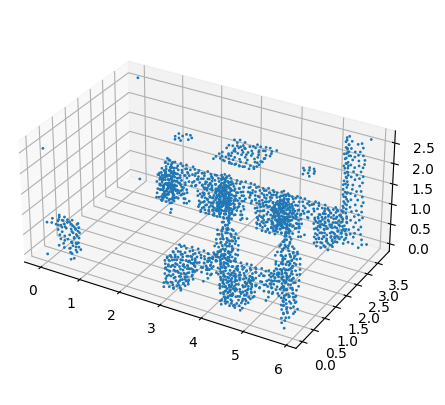

In [29]:
plot3d_points(scan1_points)

In [30]:
scan1_points_std = standardization_by_office(scan1_points, x_mean, x_std)

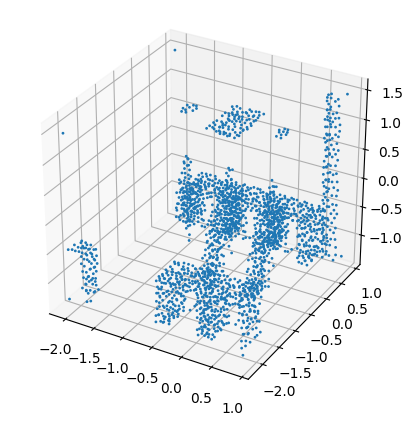

In [31]:
plot3d_points(scan1_points_std)

In [37]:
pc_array_fit = pc_array_office_fit.copy()
for i in range(df_scan.shape[0]-3):
    pc_array_fit = np.concatenate((pc_array_fit, np.expand_dims(scan1_points_std, axis=0)))

pc_array_test = pc_array_office_test.copy()
for i in range(3):
    pc_array_test = np.concatenate((pc_array_test, np.expand_dims(scan1_points_std, axis=0)))

In [38]:
pc_array_test.shape

(99, 2048, 3)

辞書作成

In [39]:
X_dict_fit = {'meta' : df_fit[['aircon','ventilation','exhaust_a','exhaust_b','exhaust_off']],
              'pointCloud' : pc_array_fit}
X_dict_test = {'meta' : df_test[['aircon','ventilation','exhaust_a','exhaust_b','exhaust_off']],
              'pointCloud' : pc_array_test}

In [40]:
y_fit = df_fit['countTimeMean_onlyFloating']
y_test = df_test['countTimeMean_onlyFloating']

学習

In [31]:
import keras
from keras.callbacks import EarlyStopping
import tensorflow as tf
import datetime

2023-07-07 15:21:37.000463: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-07 15:21:37.002712: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-07 15:21:37.033116: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-07 15:21:37.033912: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 15:21:37.717808: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [32]:
# 学習済モデルを読み込む場合

model_str = open('./saved_obj/best_model.json').read()
model = keras.models.model_from_json(model_str)
model.load_weights('./saved_obj/concat_scan_model/plus_scan1_weights_202307041515.hdf5')

model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.006781976583074642), # learning_rateにoptunaの探索結果を直接代入
        loss='mse',
        metrics=['mae'],
        )

model.summary()

Model: "predictionnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pointCloud (InputLayer)        [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 2048, 32)     128         ['pointCloud[0][0]']             
                                                                                                  
 batch_normalization (BatchNorm  (None, 2048, 32)    128         ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 2048, 32)     0           ['batch_normalization

In [ ]:
model_str = open('./saved_obj/best_model.json').read()
model = keras.models.model_from_json(model_str)
# model.load_weights('./saved_obj/best_weights.hdf5')

model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.006781976583074642), # learning_rateにoptunaの探索結果を直接代入
        loss='mse',
        metrics=['mae'],
        )

model.summary()

In [ ]:
dt_now = datetime.datetime.now()
history = model.fit(
            X_dict_fit, y_fit,
            validation_data = (X_dict_test, y_test),
            epochs = 1000,
            batch_size=64,
            callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=100, restore_best_weights=True,)],
            # callbacks = [EarlyStopping(monitor='val_sparse_categorical_accuracy', min_delta=0.0, patience=40)],
            # verbose=False,
        )

In [ ]:
# モデル保存
time = dt_now.strftime('%Y%m%d%H%M')

model_json_str = model.to_json()
open('./saved_obj/concat_scan_model/plus_scan1_model_'+time+'.json', 'w').write(model_json_str)
model.save_weights('./saved_obj/concat_scan_model/plus_scan1_weights_'+time+'.hdf5')

# 学習結果保存
hist_df = pd.DataFrame(history.history)
hist_df.to_csv('./saved_obj/concat_scan_model/plus_scan1_model_history_'+time+'.csv')

学習結果

In [33]:
# 学習結果を読み込む場合

hist_df = pd.read_csv('./saved_obj/concat_scan_model/plus_scan1_model_history_202307041515.csv')

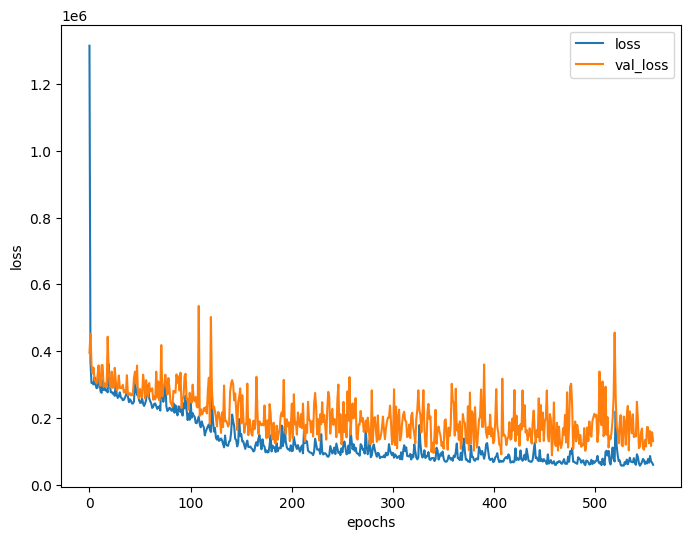

In [34]:
# 学習曲線

# hist_df = pd.DataFrame(history.history)

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot()
ax.set_xlabel('epochs')
ax.set_ylabel('loss')

x = np.array(range(len(hist_df)))
y = hist_df['loss']
ax.plot(x, y, label='loss')

y = hist_df['val_loss']
ax.plot(x, y, label='val_loss')

# ax.set_xticks([0,25,50,75,100])
# ax.set_ylim([0,1])
ax.legend(bbox_to_anchor=(1,1), loc='upper right')

plt.rcParams['font.size'] = 14

plt.show()

In [35]:
y_fit_pred = model.predict(X_dict_fit)
y_test_pred = model.predict(X_dict_test)

y_fit_pred = y_fit_pred.reshape((y_fit_pred.shape[0]))
y_test_pred = y_test_pred.reshape((y_test_pred.shape[0]))

4/4 [==============================] - 0s 9ms/step


In [68]:
np.save('./tmp/y_fit_pred.npy', y_fit_pred)
np.save('./tmp/y_test_pred.npy', y_test_pred)

/tmp/ipykernel_632021/3792197834.py:12: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


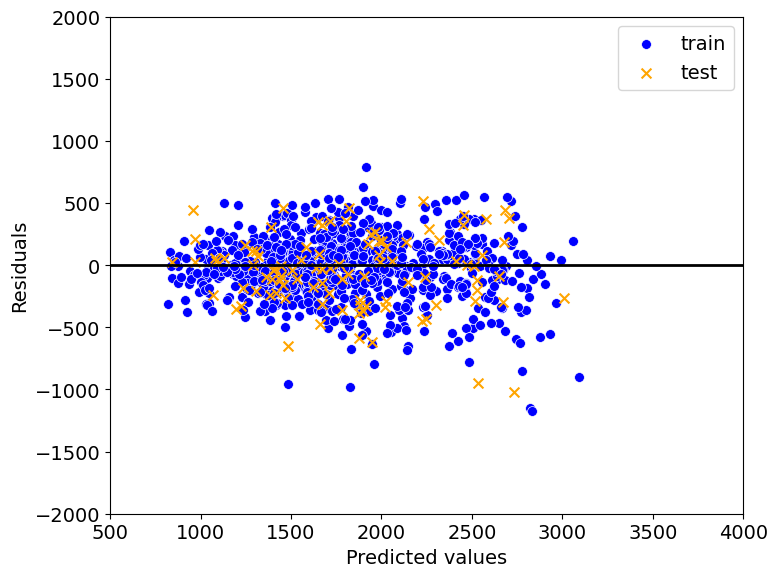

In [36]:
# 残差プロット

y_fit_residuals = y_fit_pred - y_fit
y_test_residuals = y_test_pred - y_test

plt.figure(figsize=(8,6))

plt.scatter(
    y_fit_pred, y_fit_residuals, 
    s=50, c='blue', marker='o', edgecolor="white", linewidths=0.5, label='train' 
)
plt.scatter(
    y_test_pred, y_test_residuals, 
    s=50, c='orange', marker='x', edgecolor="white", linewidths=1.5, label='test' 
)


plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="best")
plt.hlines(y=0, xmin=500., xmax=4500., color="black", lw=2)
plt.xlim(500.,4000.)
plt.ylim(-2000., 2000.)
plt.tight_layout()
plt.show()

In [37]:
model_str = open('./saved_obj/best_model.json').read()
old_model = keras.models.model_from_json(model_str)
old_model.load_weights('./saved_obj/best_weights.hdf5')

old_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.006781976583074642), # learning_rateにoptunaの探索結果を直接代入
        loss='mse',
        metrics=['mae'],
        )

In [38]:
df_ml_scan1 = df_ml[df_ml['office']=='scan1']
df_meta = df_ml_scan1[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]]

pc_scan1 = []
for i in range(df_meta.shape[0]):
    pc_scan1.append(X_dict_test['pointCloud'][-1])
pc_scan1 = np.array(pc_scan1)

In [39]:
old_y_pred = old_model.predict([df_meta, pc_scan1])

1/1 [==============================] - 0s 86ms/step


In [40]:
y_pred = model.predict([df_meta, pc_scan1])

1/1 [==============================] - 0s 86ms/step


In [41]:
old_y_pred = old_y_pred.reshape(old_y_pred.shape[0])
y_pred = y_pred.reshape(y_pred.shape[0])

In [ ]:
# np.save('./saved_obj/scan1_y_pred.npy', y_pred)

プロット

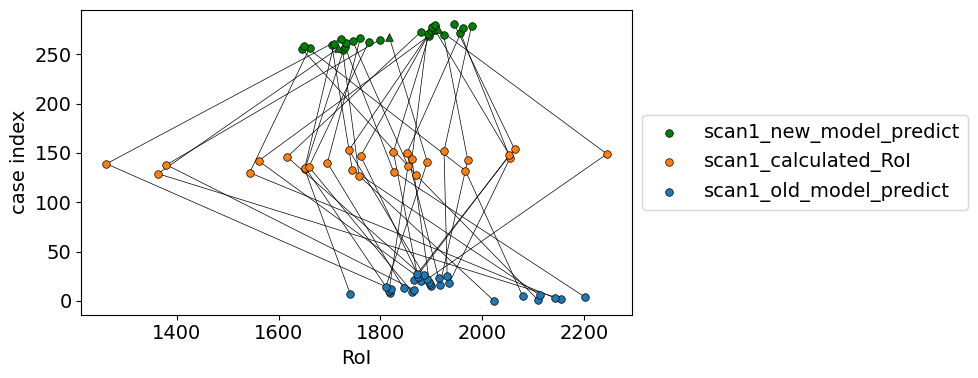

In [42]:
plt.figure(figsize=(10, 4))

case_space = 100

# 空調条件対応関係プロット

space = case_space + df_scan.shape[0] - 1

for i in range(df_scan.shape[0]):
    plt.plot([old_y_pred[i], df_scan['countTimeMean_onlyFloating'][i]], [i, i+space], c='k', lw=0.5, zorder=1)

for i in range(df_scan.shape[0]):
    plt.plot([df_scan['countTimeMean_onlyFloating'][i], y_pred[i]], [i+space, i+2*space], c='k', lw=0.5, zorder=1)


# RoIプロット

x = old_y_pred
y = list(range(old_y_pred.shape[0]))
plt.scatter(x, y, marker='o', s=30, edgecolor='k', linewidth=0.5, label=f'scan1_old_model_predict', zorder=2)

y_start = np.max(y) + case_space
x = df_scan['countTimeMean_onlyFloating']
y = list(range(df_scan.shape[0]))
y = [x + y_start for x in y]
plt.scatter(x, y, marker='o', s=30, edgecolor='k', linewidth=0.5, label=f'scan1_calculated_RoI', zorder=2)

# testデータだけマーカー変更
mk_list = []
zorder_list = []
for case_name in df_scan['case_name']:
    if case_name in df_test.index:
        mk_list.append('^')
        zorder_list.append(3)
    else:
        mk_list.append('o')
        zorder_list.append(2)

y_start = np.max(y) + case_space
x = y_pred
y = list(range(y_pred.shape[0]))
y = [x + y_start for x in y]
for i in range(x.shape[0]-1):
    plt.scatter(x[i], y[i], marker=mk_list[i], s=30, c='g', edgecolor='k', linewidth=0.5, zorder=zorder_list[i])
plt.scatter(x[-1], y[-1], marker=mk_list[-1], s=30, c='g', edgecolor='k', linewidth=0.5, label=f'scan1_new_model_predict', zorder=zorder_list[-1])

plt.xlabel('RoI')
plt.ylabel('case index')
# plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_632021/3460894714.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x[i], y[i], marker=mk_list[i], s=30, c=cmap(2/10), edgecolor='k', linewidth=0.5, zorder=zorder_list[i])
/tmp/ipykernel_632021/3460894714.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x[-1], y[-1], marker=mk_list[-1], s=30, c=cmap(2/10), edgecolor='k', linewidth=0.5, label=f'scan1_predict', zorder=zorder_list[-

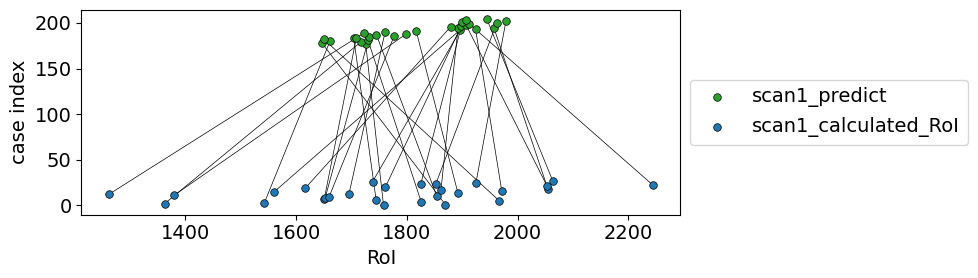

In [69]:
# 上2つだけ

plt.figure(figsize=(10, 3))

case_space = 150
cmap = plt.get_cmap('tab10')

# 空調条件対応関係プロット

space = case_space + df_scan.shape[0] - 1

for i in range(df_scan.shape[0]):
    plt.plot([df_scan['countTimeMean_onlyFloating'][i], y_pred[i]], [i, i+space], c='k', lw=0.5, zorder=1)

# RoIプロット

y_start = 0
x = df_scan['countTimeMean_onlyFloating']
y = list(range(df_scan.shape[0]))
y = [x + y_start for x in y]
plt.scatter(x, y, marker='o', s=30, edgecolor='k', linewidth=0.5, label=f'scan1_calculated_RoI', zorder=2)

# testデータだけマーカー変更
mk_list = []
zorder_list = []
for case_name in df_scan['case_name']:
    # if case_name in df_test.index:
    #     mk_list.append('^')
    #     zorder_list.append(3)
    # else:
    #     mk_list.append('o')
    #     zorder_list.append(2)
    mk_list.append('o')
    zorder_list.append(2)

y_start = np.max(y) + case_space
x = y_pred
y = list(range(y_pred.shape[0]))
y = [x + y_start for x in y]
for i in range(x.shape[0]-1):
    plt.scatter(x[i], y[i], marker=mk_list[i], s=30, c=cmap(2/10), edgecolor='k', linewidth=0.5, zorder=zorder_list[i])
plt.scatter(x[-1], y[-1], marker=mk_list[-1], s=30, c=cmap(2/10), edgecolor='k', linewidth=0.5, label=f'scan1_predict', zorder=zorder_list[-1])

plt.xlabel('RoI')
plt.ylabel('case index')
# plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()
plt.show()

↑のテストデータだけver

/tmp/ipykernel_632021/1774936214.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x[i], y[i], marker='o', c=cmap(0/10), s=30, edgecolor='k', linewidth=0.5, zorder=3)
/tmp/ipykernel_632021/1774936214.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x[-1:], y[-1:], marker='o', c=cmap(0/10), s=30, edgecolor='k', linewidth=0.5, label='scan1_calculated_RoI', zorder=3)
/tmp/ipykernel_632021/17749362

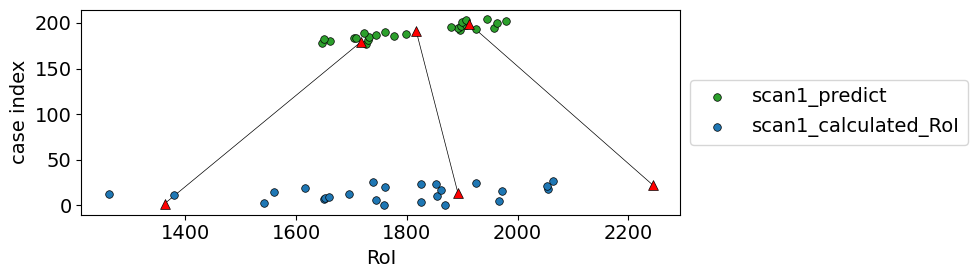

In [64]:
# 上2つだけ

plt.figure(figsize=(10, 3))

case_space = 150

cmap = plt.get_cmap('tab10')

# 空調条件対応関係プロット

space = case_space + df_scan.shape[0] - 1

for i in range(df_scan.shape[0]):
    if df_scan['case_name'][i] in df_test.index:
        plt.plot([df_scan['countTimeMean_onlyFloating'][i], y_pred[i]], [i, i+space], c='k', lw=0.5, zorder=1)

# RoIプロット

y_start = 0
x = df_scan['countTimeMean_onlyFloating']
y = list(range(df_scan.shape[0]))
y = [x + y_start for x in y]
for i in range(df_scan.shape[0]-1):
    if df_scan['case_name'][i] in df_test.index:
        plt.scatter(x[i], y[i], marker='^', c='r', s=50, edgecolor='k', linewidth=0.5, zorder=3)
    else:
        plt.scatter(x[i], y[i], marker='o', c=cmap(0/10), s=30, edgecolor='k', linewidth=0.5, zorder=3)
plt.scatter(x[-1:], y[-1:], marker='o', c=cmap(0/10), s=30, edgecolor='k', linewidth=0.5, label='scan1_calculated_RoI', zorder=3)

y_start = np.max(y) + case_space
x = y_pred
y = list(range(y_pred.shape[0]))
y = [x + y_start for x in y]
for i in range(x.shape[0]-1):
    if df_scan['case_name'][i] in df_test.index:
        plt.scatter(x[i], y[i], marker='^', s=50, c='r', edgecolor='k', linewidth=0.5, zorder=3)
    else:
        plt.scatter(x[i], y[i], marker='o', s=30, c=cmap(2/10), edgecolor='k', linewidth=0.5, zorder=2)
plt.scatter(x[-1:], y[-1:], marker='o', s=30, c=cmap(2/10), edgecolor='k', linewidth=0.5, label=f'scan1_predict', zorder=2)

plt.xlabel('RoI')
plt.ylabel('case index')
# plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()
plt.show()

精度

In [42]:
from sklearn.metrics import mean_absolute_error

In [10]:
df_office = df_ml[df_ml['office']!='scan1']
y_office = df_office['countTimeMean_onlyFloating']
df_office = df_office[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]]
df_scan = df_ml[df_ml['office']=='scan1']
y_scan = df_scan['countTimeMean_onlyFloating']
df_scan = df_scan[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]]

In [11]:
df_office

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office1_0_0,-1.387842,-1.665384,-0.868459,-0.868459,2.477379
office1_0_123_aout,-1.387842,-0.204658,1.151465,-0.868459,-0.403652
office1_0_123_bout,-1.387842,-0.204658,-0.868459,1.151465,-0.403652
office1_0_164_aout,-1.387842,0.282251,1.151465,-0.868459,-0.403652
office1_0_164_bout,-1.387842,0.282251,-0.868459,1.151465,-0.403652
...,...,...,...,...,...
office33_960_164_bout,1.293562,0.282251,-0.868459,1.151465,-0.403652
office33_960_246_aout,1.293562,1.256068,1.151465,-0.868459,-0.403652
office33_960_246_bout,1.293562,1.256068,-0.868459,1.151465,-0.403652


In [15]:
df_office.to_csv('./tmp/df_office.csv')

In [12]:
y_office

case_name
office1_0_0              2991.405667
office1_0_123_aout       2656.982333
office1_0_123_bout       2951.144667
office1_0_164_aout       2470.395667
office1_0_164_bout       3271.053000
                            ...     
office33_960_164_bout    2504.354667
office33_960_246_aout    1331.682000
office33_960_246_bout    1495.644000
office33_960_82_aout     2227.621000
office33_960_82_bout     1771.486667
Name: countTimeMean_onlyFloating, Length: 907, dtype: float64

In [16]:
y_office.to_csv('./tmp/y_office.csv')

In [44]:
df_scan

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
scan1_0_0,-1.387842,-1.665384,-0.868459,-0.868459,2.477379
scan1_0_164_aout,-1.387842,0.282251,1.151465,-0.868459,-0.403652
scan1_0_164_bout,-1.387842,0.282251,-0.868459,1.151465,-0.403652
scan1_0_246_aout,-1.387842,1.256068,1.151465,-0.868459,-0.403652
scan1_0_246_bout,-1.387842,1.256068,-0.868459,1.151465,-0.403652
scan1_0_82_aout,-1.387842,-0.691567,1.151465,-0.868459,-0.403652
scan1_0_82_bout,-1.387842,-0.691567,-0.868459,1.151465,-0.403652
scan1_360_0,-0.382315,-1.665384,-0.868459,-0.868459,2.477379
scan1_360_164_aout,-0.382315,0.282251,1.151465,-0.868459,-0.403652


In [45]:
df_scan.to_csv('./tmp/df_scan.csv')

In [14]:
y_scan

case_name
scan1_0_0             1757.936667
scan1_0_164_aout      1869.638333
scan1_0_164_bout      1362.842000
scan1_0_246_aout      1542.956667
scan1_0_246_bout      1825.899000
scan1_0_82_aout       1967.014333
scan1_0_82_bout       1744.621000
scan1_360_0           1650.899000
scan1_360_164_aout    1652.457667
scan1_360_164_bout    1659.433667
scan1_360_246_aout    1854.167333
scan1_360_246_bout    1379.586000
scan1_360_82_aout     1261.606000
scan1_360_82_bout     1695.728333
scan1_660_0           1892.099333
scan1_660_164_aout    1560.642000
scan1_660_164_bout    1971.424000
scan1_660_246_aout    1861.647667
scan1_660_246_bout    2054.722333
scan1_660_82_aout     1616.761667
scan1_660_82_bout     1761.233333
scan1_960_0           2053.385333
scan1_960_164_aout    2244.822333
scan1_960_164_bout    1852.020000
scan1_960_246_aout    1825.473333
scan1_960_246_bout    1924.897333
scan1_960_82_aout     1738.178667
scan1_960_82_bout     2063.413000
Name: countTimeMean_onlyFloating, dtyp

In [17]:
y_scan.to_csv('./tmp/y_scan.csv')

In [41]:
pc_office = []
for i in range(33):
    if i+1==29:
        continue 
    df = df_ml[df_ml['office']==f'office{i+1}']
    for j in range(df.shape[0]):
        if i+1<30:
            pc_office.append(X_dict_test['pointCloud'][3*i])
        else:
            pc_office.append(X_dict_test['pointCloud'][3*(i-1)])

pc_office = np.array(pc_office)

In [42]:
pc_scan = []
for i in range(df_scan.shape[0]):
    pc_scan.append(X_dict_test['pointCloud'][-1])

pc_scan = np.array(pc_scan)

In [43]:
np.save('./tmp/pc_office.npy', pc_office)
np.save('./tmp/pc_scan.npy', pc_scan)

In [50]:
pc_office.shape

(907, 2048, 3)

In [51]:
pc_scan.shape

(28, 2048, 3)

In [52]:
old_office_y_pred = old_model.predict([df_office, pc_office])
old_scan_y_pred = old_model.predict([df_scan, pc_scan])
office_y_pred = model.predict([df_office, pc_office])
scan_y_pred = model.predict([df_scan, pc_scan])

1/1 [==============================] - 0s 36ms/step


In [53]:
old_office_mae = mean_absolute_error(y_office, old_office_y_pred)
old_scan_mae = mean_absolute_error(y_scan, old_scan_y_pred)
office_mae = mean_absolute_error(y_office, office_y_pred)
scan_mae = mean_absolute_error(y_scan,scan_y_pred)

In [54]:
df_mae = pd.DataFrame([[old_office_mae, old_scan_mae], [office_mae, scan_mae]], columns=['office','scan'], index=['old_model','new_model'])
df_mae

,office,scan
old_model,185.022406,231.008797
new_model,194.530541,160.045929
